### Develop Your First Neural Network in Python With Keras Step-By-Step

by Jason Brownlee on May 24, 2016 in Deep Learning

http://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [199]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

In [200]:
!ls -l

total 496
-rw-r--r--. 1 user user   9770 Jul 31 02:19 bid_v007_ReScale_ts.csv
-rw-r--r--. 1 user user  36608 Jul 31 02:55 bid_v010_ts.csv
-rw-r--r--. 1 user user    667 Aug  1  2017 indicative-price.csv
-rw-r--r--. 1 user user   2334 Jul 18 15:13 international-airline-passengers.csv
-rw-r--r--. 1 user user 135581 Aug  1  2017 my_keras_bidding_ts-Copy1.ipynb
-rw-r--r--. 1 user user 192152 Jul 31 14:41 my_keras_bidding_ts_v002.ipynb
-rw-r--r--. 1 user user  93162 Jul 18 16:22 my_keras_HelloWorld.ipynb
-rw-r--r--. 1 user user  23279 Jul 17 15:01 pima-indians-diabetes.csv


In [3]:
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [4]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Fit the model
# model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
768/768 [==============================] - 1s - loss: 3.7507 - acc: 0.6003     
Epoch 2/150
768/768 [==============================] - 0s - loss: 0.9437 - acc: 0.5938     
Epoch 3/150
768/768 [==============================] - 0s - loss: 0.7515 - acc: 0.6380     
Epoch 4/150
768/768 [==============================] - 0s - loss: 0.7133 - acc: 0.6549     
Epoch 5/150
768/768 [==============================] - 0s - loss: 0.6830 - acc: 0.6732     
Epoch 6/150
768/768 [==============================] - 0s - loss: 0.6517 - acc: 0.6797     
Epoch 7/150
768/768 [==============================] - 0s - loss: 0.6502 - acc: 0.6771     
Epoch 8/150
768/768 [==============================] - 0s - loss: 0.6384 - acc: 0.6836     
Epoch 9/150
768/768 [==============================] - 0s - loss: 0.6252 - acc: 0.6940     
Epoch 10/150
768/768 [==============================] - 0s - loss: 0.6318 - acc: 0.6758     
Epoch 11/150
768/768 [==============================] - 0s - loss: 0.6498 - acc

In [7]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

672/768 [=========================>....] - ETA: 0s
acc: 78.26%


### Time Series Prediction With Deep Learning in Keras

http://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/

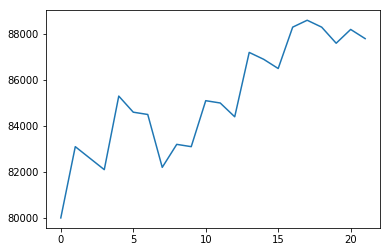

In [201]:
import pandas
import matplotlib.pyplot as plt
# dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
# dataset = pandas.read_csv('bid_v010_ts.csv', usecols=[1], engine='python', skipfooter=3)
dataset = pandas.read_csv('indicative-price.csv', usecols=[2], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [202]:
dataset.head()

,final-price
0,80000
1,83100
2,82600
3,82100
4,85300


In [203]:
import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense

In [204]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [205]:
# load the dataset
# dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
# dataset = pandas.read_csv('bid_v010_ts.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataset.values
dataset = dataset.astype('float32')

In [206]:
len(dataset)

22

In [207]:
# split into train and test sets
train_size = int(len(dataset) * 0.82)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

18 4


In [208]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [224]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [225]:
train

array([[ 80000.],
       [ 83100.],
       [ 82600.],
       [ 82100.],
       [ 85300.],
       [ 84600.],
       [ 84500.],
       [ 82200.],
       [ 83200.],
       [ 83100.],
       [ 85100.],
       [ 85000.],
       [ 84400.],
       [ 87200.],
       [ 86900.],
       [ 86500.],
       [ 88300.],
       [ 88600.]], dtype=float32)

In [226]:
trainX

array([[ 80000.,  83100.,  82600.],
       [ 83100.,  82600.,  82100.],
       [ 82600.,  82100.,  85300.],
       [ 82100.,  85300.,  84600.],
       [ 85300.,  84600.,  84500.],
       [ 84600.,  84500.,  82200.],
       [ 84500.,  82200.,  83200.],
       [ 82200.,  83200.,  83100.],
       [ 83200.,  83100.,  85100.],
       [ 83100.,  85100.,  85000.],
       [ 85100.,  85000.,  84400.],
       [ 85000.,  84400.,  87200.],
       [ 84400.,  87200.,  86900.],
       [ 87200.,  86900.,  86500.]], dtype=float32)

In [227]:
trainY

array([ 82100.,  85300.,  84600.,  84500.,  82200.,  83200.,  83100.,
        85100.,  85000.,  84400.,  87200.,  86900.,  86500.,  88300.], dtype=float32)

In [228]:
testX

array([], dtype=float64)

In [229]:
testY

array([], dtype=float64)

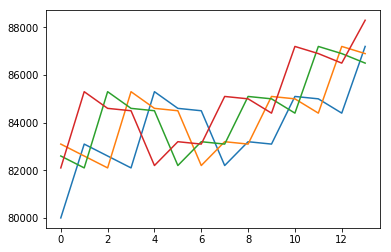

In [230]:
# plt.plot(testX)
plt.plot(trainX)
plt.plot(trainY)
plt.show()

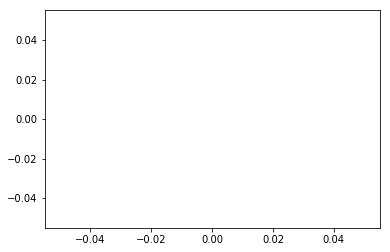

In [231]:
# plt.plot(testX)
plt.plot(testX)
plt.plot(testY)
plt.show()

In [193]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=950, batch_size=2, verbose=2)

Epoch 1/950
0s - loss: 983150320.0000
Epoch 2/950
0s - loss: 828683824.0000
Epoch 3/950
0s - loss: 688708288.0000
Epoch 4/950
0s - loss: 564326376.0000
Epoch 5/950
0s - loss: 455982708.0000
Epoch 6/950
0s - loss: 361630424.0000
Epoch 7/950
0s - loss: 282767048.0000
Epoch 8/950
0s - loss: 216359448.0000
Epoch 9/950
0s - loss: 162393612.0000
Epoch 10/950
0s - loss: 118464638.0000
Epoch 11/950
0s - loss: 85799843.0000
Epoch 12/950
0s - loss: 59794927.0000
Epoch 13/950
0s - loss: 40857876.7500
Epoch 14/950
0s - loss: 27218761.2500
Epoch 15/950
0s - loss: 18289739.0625
Epoch 16/950
0s - loss: 11834374.2500
Epoch 17/950
0s - loss: 8049593.1328
Epoch 18/950
0s - loss: 5512530.1797
Epoch 19/950
0s - loss: 4033800.2866
Epoch 20/950
0s - loss: 3313979.3181
Epoch 21/950
0s - loss: 2877483.9519
Epoch 22/950
0s - loss: 2647077.3867
Epoch 23/950
0s - loss: 2504886.8516
Epoch 24/950
0s - loss: 2517007.3750
Epoch 25/950
0s - loss: 2446625.6484
Epoch 26/950
0s - loss: 2439396.4688
Epoch 27/950
0s - los

0s - loss: 2470079.7344
Epoch 232/950
0s - loss: 2444462.7539
Epoch 233/950
0s - loss: 2482864.9883
Epoch 234/950
0s - loss: 2465338.7969
Epoch 235/950
0s - loss: 2459320.2109
Epoch 236/950
0s - loss: 2452704.1484
Epoch 237/950
0s - loss: 2501558.5625
Epoch 238/950
0s - loss: 2467133.6328
Epoch 239/950
0s - loss: 2592171.2695
Epoch 240/950
0s - loss: 2453664.6680
Epoch 241/950
0s - loss: 2617247.6797
Epoch 242/950
0s - loss: 2499395.0781
Epoch 243/950
0s - loss: 2501692.0859
Epoch 244/950
0s - loss: 2462823.2578
Epoch 245/950
0s - loss: 2626853.3906
Epoch 246/950
0s - loss: 2442289.5000
Epoch 247/950
0s - loss: 2499586.8828
Epoch 248/950
0s - loss: 2475977.6094
Epoch 249/950
0s - loss: 2436588.4609
Epoch 250/950
0s - loss: 2498746.8516
Epoch 251/950
0s - loss: 2455166.6641
Epoch 252/950
0s - loss: 2455201.9609
Epoch 253/950
0s - loss: 2473909.4219
Epoch 254/950
0s - loss: 2460058.8359
Epoch 255/950
0s - loss: 2676308.6953
Epoch 256/950
0s - loss: 2459187.7148
Epoch 257/950
0s - loss: 2

Epoch 456/950
0s - loss: 2472875.4883
Epoch 457/950
0s - loss: 2497238.6797
Epoch 458/950
0s - loss: 2518544.2812
Epoch 459/950
0s - loss: 2497739.2148
Epoch 460/950
0s - loss: 2459818.7031
Epoch 461/950
0s - loss: 2474876.8672
Epoch 462/950
0s - loss: 2479914.0000
Epoch 463/950
0s - loss: 2468385.4023
Epoch 464/950
0s - loss: 2452253.5703
Epoch 465/950
0s - loss: 2645544.9219
Epoch 466/950
0s - loss: 2593332.5938
Epoch 467/950
0s - loss: 2549120.8438
Epoch 468/950
0s - loss: 2491804.4922
Epoch 469/950
0s - loss: 2486147.1406
Epoch 470/950
0s - loss: 2727757.6875
Epoch 471/950
0s - loss: 2438356.9688
Epoch 472/950
0s - loss: 2486324.0469
Epoch 473/950
0s - loss: 2469103.1875
Epoch 474/950
0s - loss: 2524695.1797
Epoch 475/950
0s - loss: 2631053.9844
Epoch 476/950
0s - loss: 2481449.5938
Epoch 477/950
0s - loss: 2591164.8594
Epoch 478/950
0s - loss: 2475841.3281
Epoch 479/950
0s - loss: 2475373.7031
Epoch 480/950
0s - loss: 2500736.8047
Epoch 481/950
0s - loss: 2550819.6094
Epoch 482/95

0s - loss: 2449678.2344
Epoch 684/950
0s - loss: 2520094.4062
Epoch 685/950
0s - loss: 2478181.4375
Epoch 686/950
0s - loss: 2548853.7305
Epoch 687/950
0s - loss: 2536319.1875
Epoch 688/950
0s - loss: 2469919.2734
Epoch 689/950
0s - loss: 2469201.2070
Epoch 690/950
0s - loss: 2503392.9375
Epoch 691/950
0s - loss: 2727410.8906
Epoch 692/950
0s - loss: 2350693.4766
Epoch 693/950
0s - loss: 2517387.2793
Epoch 694/950
0s - loss: 2527313.1406
Epoch 695/950
0s - loss: 2524655.9297
Epoch 696/950
0s - loss: 2478948.8125
Epoch 697/950
0s - loss: 2546412.3672
Epoch 698/950
0s - loss: 2761588.7695
Epoch 699/950
0s - loss: 2503633.6914
Epoch 700/950
0s - loss: 2564906.7031
Epoch 701/950
0s - loss: 2444442.7500
Epoch 702/950
0s - loss: 2479601.4844
Epoch 703/950
0s - loss: 2585877.9375
Epoch 704/950
0s - loss: 2464133.1562
Epoch 705/950
0s - loss: 2461074.2109
Epoch 706/950
0s - loss: 2790707.1875
Epoch 707/950
0s - loss: 2595279.1719
Epoch 708/950
0s - loss: 2476014.2266
Epoch 709/950
0s - loss: 2

0s - loss: 2438504.8984
Epoch 910/950
0s - loss: 2482855.7695
Epoch 911/950
0s - loss: 2474876.6250
Epoch 912/950
0s - loss: 2450978.2656
Epoch 913/950
0s - loss: 2503218.8516
Epoch 914/950
0s - loss: 2600784.8750
Epoch 915/950
0s - loss: 2602970.3359
Epoch 916/950
0s - loss: 2514880.7773
Epoch 917/950
0s - loss: 2519901.9805
Epoch 918/950
0s - loss: 2729646.2109
Epoch 919/950
0s - loss: 2491579.2578
Epoch 920/950
0s - loss: 2528634.8594
Epoch 921/950
0s - loss: 2517768.8672
Epoch 922/950
0s - loss: 2770492.3281
Epoch 923/950
0s - loss: 2435064.8750
Epoch 924/950
0s - loss: 2543748.2832
Epoch 925/950
0s - loss: 2775958.3711
Epoch 926/950
0s - loss: 2550378.1094
Epoch 927/950
0s - loss: 2719877.6562
Epoch 928/950
0s - loss: 2615942.3633
Epoch 929/950
0s - loss: 2525736.8008
Epoch 930/950
0s - loss: 2576994.1953
Epoch 931/950
0s - loss: 2633151.0156
Epoch 932/950
0s - loss: 2575936.0273
Epoch 933/950
0s - loss: 2700977.2031
Epoch 934/950
0s - loss: 2482282.3359
Epoch 935/950
0s - loss: 2

In [194]:
import math

In [195]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 2426352.00 MSE (1557.68 RMSE)
Test Score: 799590.06 MSE (894.20 RMSE)


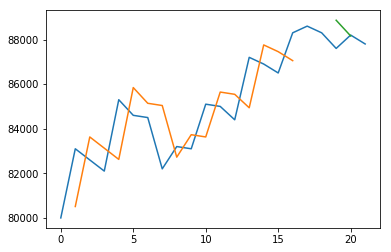

In [196]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

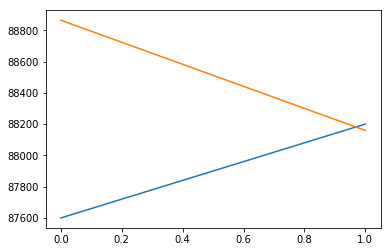

In [197]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset[len(trainPredict)+(look_back*2)+1:len(dataset)-1])
# plt.plot(trainPredictPlot)
plt.plot(testPredict)
plt.show()

In [198]:
print(testY)
print(testPredict)

[ 87600.  88200.]
[[ 88863.9375   ]
 [ 88159.4765625]]
